<a href="https://colab.research.google.com/github/McNealFielies/McNealFielies.github.io/blob/main/Copy_of_Parkinson's_Disease_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

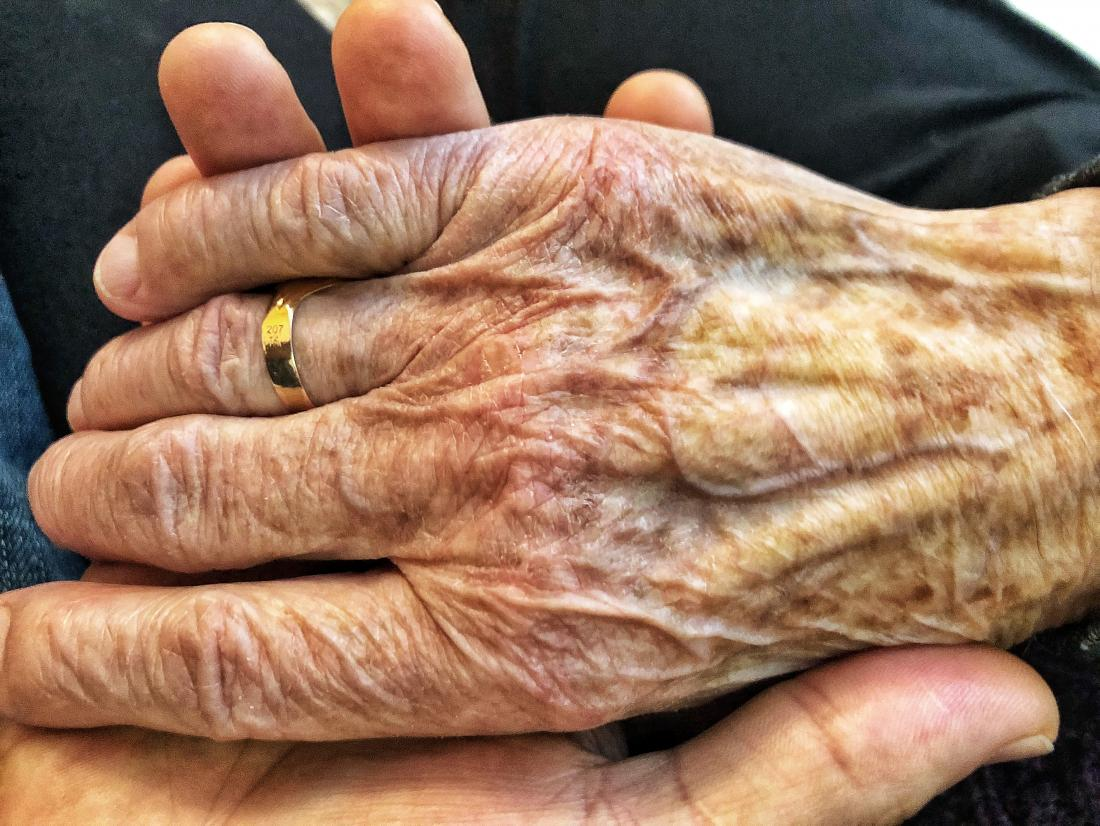

# Attribute Information:
**Matrix column entries (attributes):**

**name - ASCII subject name and recording number**

**MDVP:Fo(Hz) - Average vocal fundamental frequency**

**MDVP:Fhi(Hz) - Maximum vocal fundamental frequency**

**MDVP:Flo(Hz) - Minimum vocal fundamental frequency**

**MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency**

**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude**

**NHR, HNR - Two measures of the ratio of noise to tonal components in the voice**

**status - The health status of the subject (one) - Parkinson's, (zero) - healthy**

**RPDE, D2 - Two nonlinear dynamical complexity measures**

**DFA - Signal fractal scaling exponent**

**spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation**

In [3]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [4]:
# Let's Load in our data

df = pd.read_csv("/content/parkinsons.csv")

In [5]:
# Lets have a look at the first 5 rows of the data to get a better understanding
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
# Let's see how many rows and columns we have in the dataset


df.shape

(195, 24)

In [7]:
# Let's see the infomation


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
# See if there are any misssing value in our dataset

df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
# Lets get a statistical describtion about the data

df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# **Visualization**

<ipython-input-10-13e01447f9a5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="coolwarm", annot=True)


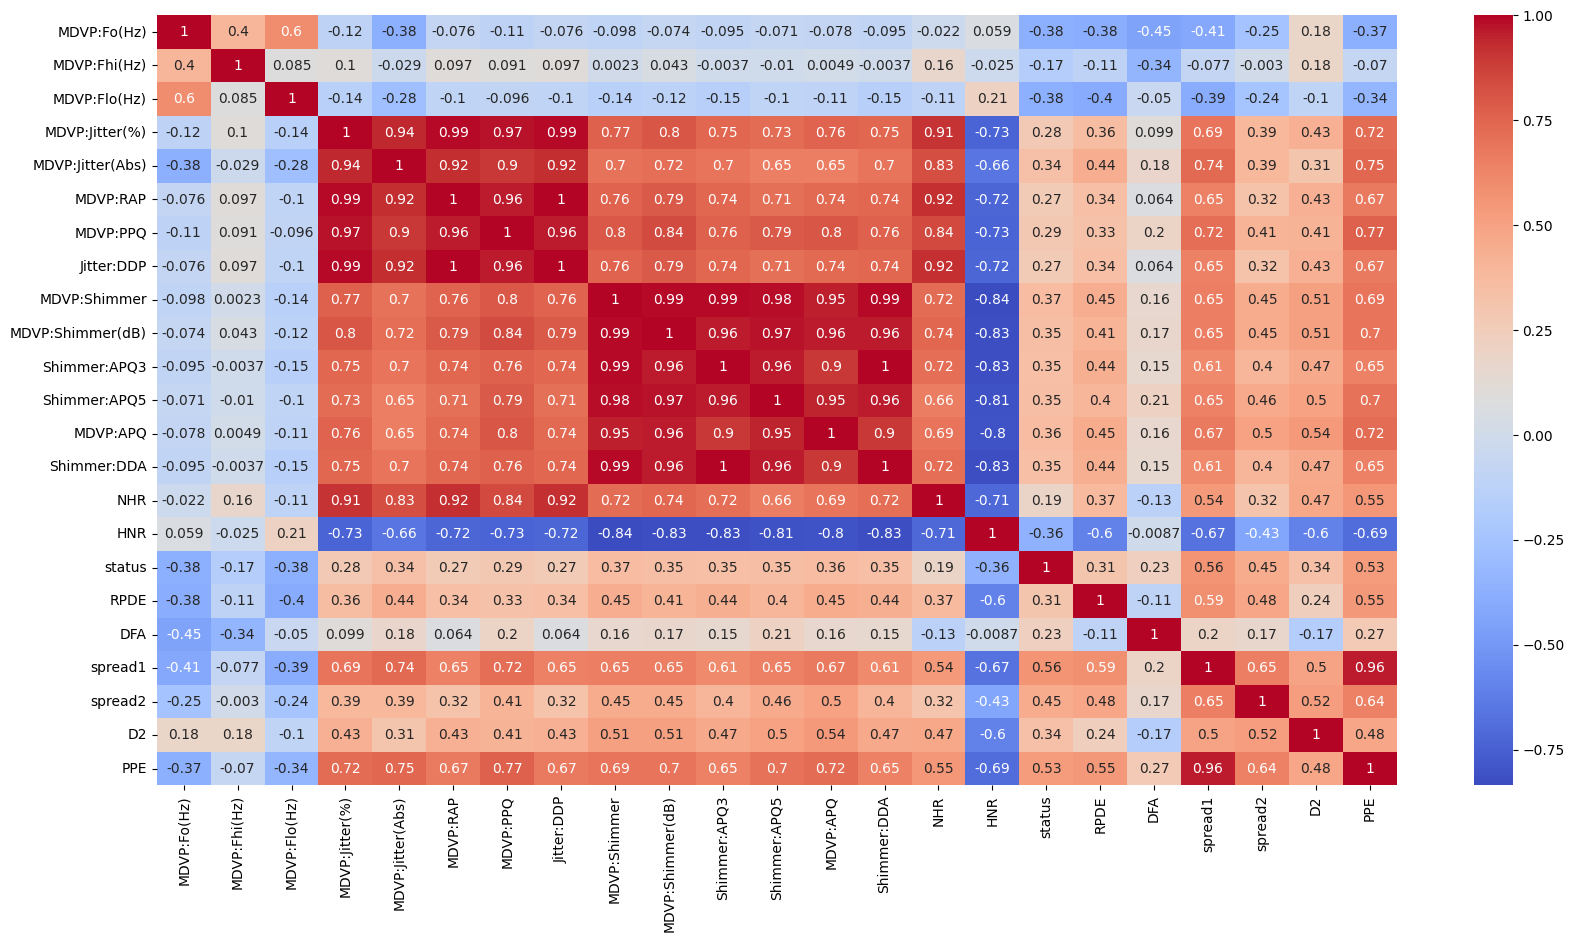

In [10]:
# Let's create a heatmap to see the correlation between each features

plt.figure(figsize=(20, 10))


dataplot = sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

1    147
0     48
Name: status, dtype: int64


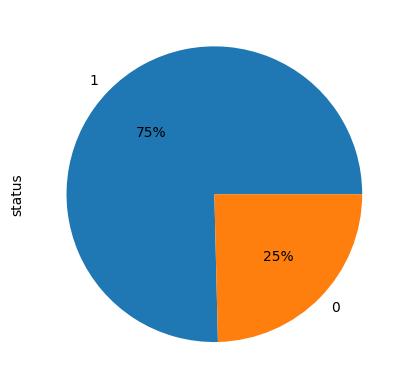

In [11]:
df['status'].value_counts().plot(kind="pie", autopct = "%1.0f%%")

print(df['status'].value_counts())

In the above code and pie chart we can see that we have 147 or 75% of the patients in the dataset have parkinson's disease and that 48 or 25% of the patient are healthy

In [12]:
df.groupby('status').mean()

<ipython-input-12-b48f8e817573>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# **Data Pre-Processing**

Lets seperate our data into features and Targets

In this case we are going to drop the name column as well because it do not serve any purpose now

In [13]:
# lets remove the name and status column from the rest of the dataset

X= df.drop(columns=['name', 'status'], axis=1)
Y = df["status"]

# Y is now only represent the status column alone



In [14]:
# Let's have a look to see if the status and name column has been remove

print(X)
print(Y)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

# **Splitting the data into Test and Train**

In [15]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.25, random_state=2)

In [16]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(195, 22)
(146, 22)
(49, 22)


We can see that the data have succesfully splitted

Now let's standerdize our data

## **Data Standardization**

Let's Standerdize the data so that all of our columns values are more or less in the same range but the meaning of the value wont change

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
# Let's transform the X_train first

X_train = scaler.transform(X_train)

# Now let's transform the X_test
X_test = scaler.transform(X_test)

# **Train our Model**

In this case we are going to use the **Support Vector Machine (SVM)**

In [20]:
model = svm.SVC(kernel = 'linear')

In [21]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

# **Model Evaluation**

In this part we going to see how well our model has been trained by getting the accuracy score

In [22]:
# Let's get the accuracy score on the training data

X_train_prediction = model.predict(X_train)

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [23]:
print('Accuracy score of training data is : ', training_data_accuracy)

Accuracy score of training data is :  0.8972602739726028


In [24]:
# Let's get the accuracy score on the test data

X_test_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [25]:
print('Accuracy score of test data is : ', test_data_accuracy)

Accuracy score of test data is :  0.8367346938775511


# **Let's build a predictive system**

In [26]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing the input data into a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# Let's reshaped the numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standize the data

std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)

print(prediction)

if (prediction[0] == 0):
  print("The Patient does not have Parkinson's Disease")
else:
  print("Parkinson's Disease has been detacted in the patient")

[0]
The Patient does not have Parkinson's Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
